# Vignette of plotting hapROH output

In [1]:
import os as os

## 0) Set the path
If wanted, set the path here to the path you want to work in (relative data loads will be done from there)

In [3]:
### Fill in your own path here!
#path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path to Package Midway Cluster
#path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
path = "/n/groups/reich/hringbauer/"
os.chdir(path)  # Set the right Path (in line with Atom default)
print(f"Set path to: {os.getcwd()}") # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns

Set path to: /n/groups/reich/hringbauer


# 1) Various Plotting functions
General rule: savepath="PATH/FILE.pdf" controls where the resulting figure is saved to
Change .pdf and .png for different file formats

### Plot the Posterior along one Chromosome. 
Needs the posterior to be saved,
(so in hapsb_ind use delete=False to keep it)

Set folder to the chromosome output you want to plot

In [6]:
from hapsburg.figures.plot_posterior import plot_posterior_cm

Successfully loaded Data from: ./Empirical/Eigenstrat/Example/I1178/chr4/


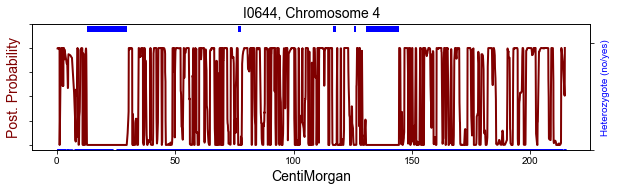

In [14]:
plot_posterior_cm(folder = "./Empirical/Eigenstrat/Example/I1178/chr4/", savepath="", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="I0644, Chromosome 4"
                  )

### Zoom in

Successfully loaded Data from: ./Empirical/Eigenstrat/Example/I1178/chr4/


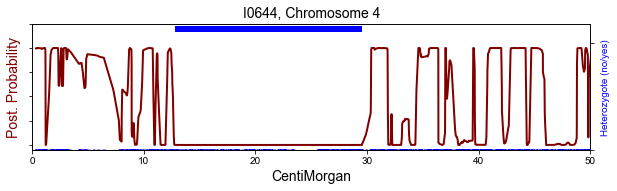

In [20]:
plot_posterior_cm(folder = "./Empirical/Eigenstrat/Example/I1178/chr4/", savepath="", 
                  empirical=True, m=1, cm_lim=[0,50], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="I0644, Chromosome 4"
                  )

### Plot Karyotype Plot with ROH
Only requires chromosome output csv files

In [15]:
from hapsburg.figures.plot_individual_roh import plot_roh_individual

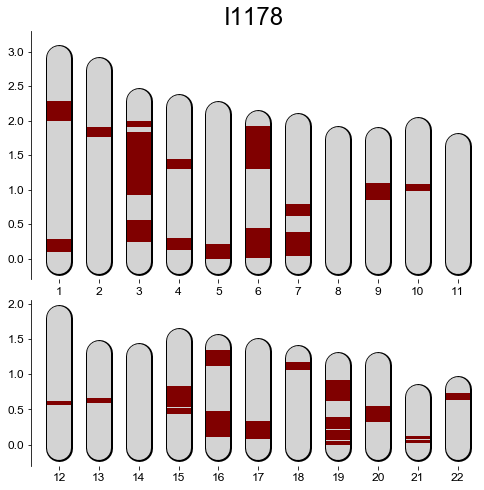

In [16]:
plot_roh_individual(iid="I1178", folder="./Empirical/Eigenstrat/Example/", 
                    prefix_out="", min_cm=4, plot_bad=False)  # MA89

### Holy Molly
That was the individuals with the most ROH in the sample

### Do Histogram of the Length Distribution and theoretical expectations

In [17]:
from hapsburg.figures.plot_individual_roh import plot_pde_indivdiual

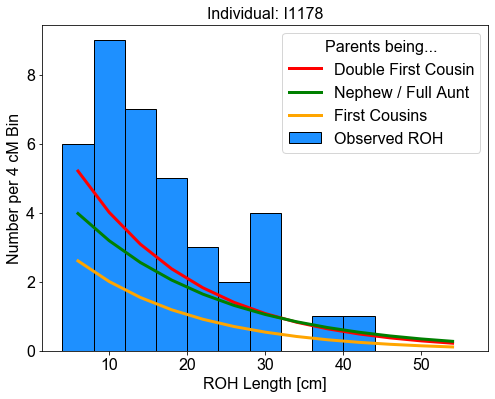

In [18]:
plot_pde_indivdiual(iid="I1178", min_cm=3, bw_cm=4, 
                    kde_plot=False, plotlim=[4, 60], prefix_out="",
                    savepath="", folder="./Empirical/Eigenstrat/Example/")

## 1.1) Plot summary over multiple Individuals

First plot only expectations, for instance as a legend.
You could choose which expectations in the method parameters

In [22]:
from hapsburg.figures.plot_bars import plot_legend_only, plot_panel_row, prepare_dfs_plot

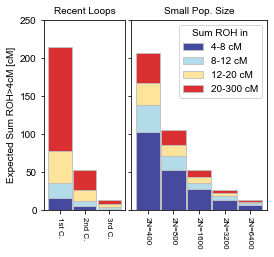

In [23]:
plot_legend_only(savepath="", figsize=(4,3.5))

### Now plot an empirical dataset. 
prepare_dfs_plot prepared from the combined csv (splitting it up into a list of dfs per group)

plot_panel_row then plots these data frames  

In this simple usecase, the two individuals analyzed above (from two different populations) are plotted, together with a legend to the right.

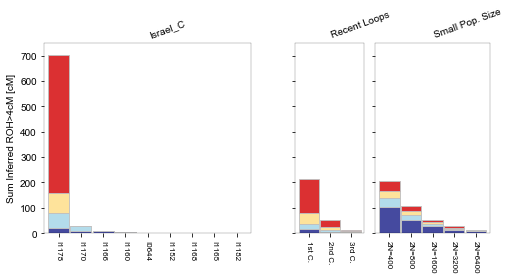

In [44]:
df1 = pd.read_csv("./Empirical/Eigenstrat/Example/combined_roh05.csv", sep='\t')
plot_dfs, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])

# ./figures_test/freilich20_bars.pdf
plot_panel_row(plot_dfs, savepath="", wspace=0.1, r_title=20, leg_pos=-2, 
               ylim=[0,750], figsize=(8,3.5))

Looks like we detected one highly inbred individual!

# Plot timelines
Attention: requires basemap package, which can be tricky to install. Also needs metafile with latitude, longitude and age

In [2]:
import pandas as pd
from hapsburg.figures.plot_timelines import plot_map_time, extract_pop, prep_label

### one example, using a metafile that has the information
[global results will be released with publication]

Initial: 1**2 * RBF(length_scale=1e+03) + WhiteKernel(noise_level=2)
Optimum: 3.94**2 * RBF(length_scale=1.5e+03) + WhiteKernel(noise_level=2)
Log-Marginal-Likelihood: -228.00376954422717


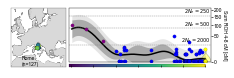

In [33]:
pop = "Rome"
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep="\t")
df_t = extract_pop(df1, age_range=[0,12200], pop=pop) # Cut out the right samples
label = prep_label(df_t, pop)

plot_map_time(df_t, figsize=(3.6 , 1.1), crs_m=[28, 63, -11, 38], 
              width_ratios=(8, 20), height_ratios=[15, 1], hspace=0.06, wspace=0.015,
              s_tl=12, ec="k", lw=0.09, x_lim_tl=[-500, 12200], vrange_m=[0,12200], 
              y_lim_tl=[0,220], fsl=5, fs=5, fs_leg=5, leg_loc_tl="", title_tl="",
              map_title=label, title_loc=(0.2,0.01), cm=4, cm1=8, frac=0, 
              lgth_s=[1500,1500], bottomrow=False, rightcol=True, lw_fit=1.5, 
              ticks=[158.74, 83.82, 21.84], tick_l=[f"$2N_e=250$", f"$2N_e=500$", f"$2N_e=2000$"], 
              width_t=0.6, length_t=2, lbl_pad_time=5, lbl_pad_age=0, xl_pad=1.5, yl_pad=1, 
              widths=800, alpha_vio=0.4, savepath="")